## 利用大模型的能力,来构建pupeteer 自动爬虫系统

1 通过大模型获得要点击(要输入) 位置的 xpath


In [53]:
%%writefile screenshot.js
const puppeteer = require('puppeteer-extra');
const StealthPlugin = require('puppeteer-extra-plugin-stealth');
puppeteer.use(StealthPlugin());

const url = process.argv[2];
const timeout = 4000;

(async () => {
    const browser = await puppeteer.launch({
        headless: false, // 非无头模式
        // executablePath: '/Applications/Google Chrome.app/Contents/MacOS',
        executablePath: '/Users/zhaoxuefeng/.cache/puppeteer/chrome/mac_arm-121.0.6167.85/chrome-mac-arm64/Google Chrome for Testing.app/Contents/MacOS/Google Chrome for Testing',
        // userDataDir: '/Users/zhaoxuefeng/Library/Application Support/Google/Chrome',
        // devtools: true, //开发者模式打开
    });
    
    const page = await browser.newPage();

    await page.setViewport({
        width: 1200,
        height: 1200,
        deviceScaleFactor: 1,
    });

    await page.goto(url, {
        waitUntil: "domcontentloaded",
        timeout: timeout,
    });

    await page.waitForTimeout(timeout);

    
    await page.screenshot({
        path: "screenshot.jpg",
        fullPage: true,
    });
    
    await page.mouse.move(662, 210);
    // await page.mouse.click();
    await page.waitForTimeout(timeout);
    
    
    const x = 650;  // x 坐标
    const y = 320;  // y 坐标
    // 获取元素的 HTML 内容和 XPath
  const result = await page.evaluate(async (x, y) => {
    // 创建一个元素位于指定坐标的快照
    const element = document.elementFromPoint(x, y);
    if (element) {
      // 获取元素的 HTML 内容
      const html = element.outerHTML;

      // 生成 XPath
      function getElementXPath(element) {
        let path = '';
        for (; element && element.nodeType === Node.ELEMENT_NODE; element = element.parentNode) {
          const siblings = Array.from(element.parentNode.children).filter(el => el.nodeType === Node.ELEMENT_NODE);
          const index = siblings.indexOf(element) + 1;
          path = `${element.tagName.toLowerCase()}[${index}]${path}`;
          if (element.parentNode.nodeType === Node.DOCUMENT_NODE) {
            break;
          } else {
            path = `/${path}`;
          }
        }
        return path;
      }

      const xpath = getElementXPath(element);
      return { html, xpath };
    } else {
      return { html: null, xpath: null };
    }
   }, x, y);

    
      // 打印结果
    console.log('Element HTML:', result.html);
    console.log('Element XPath:', result.xpath);
    

    // await page.mouse.click(650,320);
    // await page.keyboard.type('Hello World!');
    
    await page.locator('xpath///*[@id="kw"]').fill('sdcsdgsdfsdg')
    
    // await page.locator('xpath//html/body/main/div[1]/div[2]/div/input').fill('https://www.bilibili.com/video/BV1pH4y1w7Ew/?spm_id_from=333.1007.tianma.2-1-3.click&vd_source=d4ebd745c981f5c9835bd985e88ae31d');
    
    
    console.log('start')
    await page.waitForTimeout(timeout);
    console.log('end')

    // await browser.close();
})();


Overwriting screenshot.js


In [54]:
!node screenshot.js http://www.baidu.com


  Degraded performance warning:
  Launching Chrome on Mac Silicon (arm64) from an x64 Node installation results in
  Rosetta translating the Chrome binary, even if Chrome is already arm64. This would
  result in huge performance issues. To resolve this, you must run Puppeteer with
  a version of Node built for arm64.
Element HTML: <input id="kw" name="wd" class="s_ipt" value="" maxlength="255" autocomplete="off">
Element XPath: html[1]/body[2]/div[5]/div[2]/div[5]/div[1]/div[1]/form[4]/span[8]/input[3]
start
end
^C


In [57]:
from zxftools_dev.llms import get_llm

In [58]:
llm = get_llm()

In [ ]:
<input id="kw" name="wd" class="s_ipt" value="" maxlength="255" autocomplete="off">

In [59]:
llm.complete('<input id="kw" name="wd" class="s_ipt" value="" maxlength="255" autocomplete="off">  告诉我它的xpath')

CompletionResponse(text='该输入框的XPath为：//*[@id="kw"]', additional_kwargs={}, raw={'id': 'chatcmpl-9lutWSWtbeLXHdYGpc9B5kB69kuh0', 'choices': [Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='该输入框的XPath为：//*[@id="kw"]', role='assistant', function_call=None, tool_calls=None), content_filter_results={'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}})], 'created': 1721207146, 'model': 'gpt-35-turbo', 'object': 'chat.completion', 'service_tier': None, 'system_fingerprint': None, 'usage': CompletionUsage(completion_tokens=13, prompt_tokens=43, total_tokens=56), 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {

In [ ]:
//*[@id="kw"]

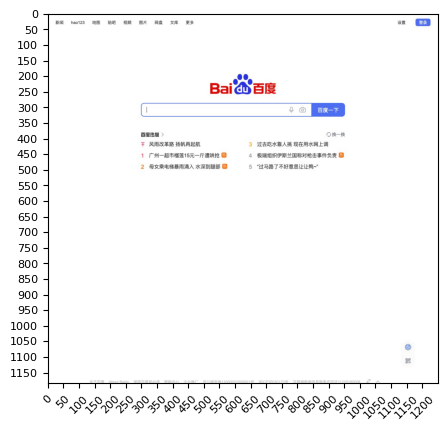

In [78]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
细粒度 = 50
# 加载图像
img = mpimg.imread('./img/screenshot.jpg')

# 创建图形和坐标轴
fig, ax = plt.subplots()

# 显示图像
ax.imshow(img)
ax.tick_params(axis='both', which='major', labelsize=8)  # 主刻度标签字体大小设置为8
ax.tick_params(axis='both', which='minor', labelsize=6)  # 副刻度标签字体大小设置为6（如果有副刻度的话）

# 显示坐标轴
ax.axis('on')  # 显示坐标轴，设置为 'off' 可以隐藏坐标轴

# 细粒度设置 X 轴刻度位置
x_ticks = np.arange(0, img.shape[1], step=细粒度)  # 设置每10像素一个刻度
ax.set_xticks(x_ticks)

# 细粒度设置 Y 轴刻度位置
y_ticks = np.arange(0, img.shape[0], step=细粒度)  # 设置每10像素一个刻度
ax.set_yticks(y_ticks)
plt.xticks(rotation=45)  # Y 轴标签旋转45度
# 保存图像到文件
plt.savefig('saved_image_with_axes.png', dpi=300)  # 可以选择保存为不同的格式，例如 .png, .jpg, .pdf 等

# 显示图像
plt.show()


In [79]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal
from llama_index.core.multi_modal_llms.generic_utils import load_image_urls


In [80]:
from llama_index.core import SimpleDirectoryReader


In [81]:
openai_mm_llm = OpenAIMultiModal(
    model="gpt-4-vision-preview", api_base="https://api.gptsapi.net/v1",
                                api_key=os.environ.get('WildCard_API_KEY'), max_new_tokens=300
)

In [82]:
image_documents = SimpleDirectoryReader('./img2').load_data()


In [83]:
response = openai_mm_llm.complete(
    prompt="告诉我输入框和搜索按钮的位置",
    image_documents=image_documents,
)

In [84]:
print(response.text)

在这张图片中，输入框和搜索按钮的位置如下：

- 输入框的位置：大约在 (450, 300) 到 (850, 350) 之间。
- 搜索按钮的位置：大约在 (860, 300) 到 (950, 350) 之间。

这些坐标是基于图片中的像素位置估算的。
